# Supply Chain Analytics

### Optimal Capacity

La compa ̃n ́ıa farmac ́eutica internacional CYS est ́a explorando la posibilidad de producir el f ́armacoWozacpara el tratamientode pacientes con malaria.  La compa ̃n ́ıa estima que la demanda en primer a ̃no de operaci ́on ser ́a de 50,000 unidades y que crecer ́aalrededor de 5% anualmente.  Si *CYS* construye una planta con capacidad de producci ́on dexunidades por a ̃no, incurrir ́ıa enun costo estimado de \$16x.  Cada unidad deWozactendr ́a un precio de venta de \$3 y un costo de producción de \$0.20.  El costo de operaci ́on por unidad de capacidad por a ̃no es de \$0.40.  El objetivo es determinar la capacidad de producci ́on de laplanta a construir, con el fin de maximizar las ganancias en los proximos 10 años.

* Presente y describa una formulaci ́on algebr ́aica apropiada para este problema.
* Formule y resulva el problema usando Scipy (Nelder Mead) y compare sus resultados.

In [6]:
# Libraries imports
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [3]:
# Parameters
x0 = 200       # For initializing the nonlinear optimization method

We define this function in Python as follows:We define this function in Python as follows:

$$profit({\color{red}c}) = \sum_{i = 1}^{10} 3 \cdot min(50000 \cdot 1.05^{i}; {\color{red}c}) - (0.40 \cdot {\color{red}c} + 0.20 \cdot min(50000 \cdot 1.05^{i}; {\color{red}c}))$$

In [58]:
utilidad = []
for i in range(10):
    c = 55125
    año = i
    print(año)
    utilidad += [3*min(50000*1.05**año, c) - (0.40*c + 0.20*min(50000*1.05**año, c))]
print(utilidad, 16*c)
print(sum(utilidad) - 16*c)


0
1
2
3
4
5
6
7
8
9
[117950.0, 124950.0, 132300.0, 132300.0, 132300.0, 132300.0, 132300.0, 132300.0, 132300.0, 132300.0] 882000
419300.0


In [70]:
# Profit Quadratic Function
def profit(c):
   utilidad = []
   for i in range(10):
       utilidad += [3*min(50000*1.05**i, c) - (0.40*c + 0.20*min(50000*1.05**i, c))]
   return -1*(sum(utilidad) - 16*c)

In [71]:
profit(55125)

-419300.0

Note that the function above returns the negative of the profit, as the method below minimizes by default:

In [72]:
# Optimization Method                            
optimization = minimize(profit, x0, method='Nelder-Mead', options={'xtol': 1e-8, 'disp': False})

The Nealder-Mead method searches without the use of derivatives, instead it maintains an ensemble of solutions ranked by solution quality

In [73]:
# Results Display
print ("Optimal Capacity: %d" %optimization.x[0])
print ("Maximum Profit: $%.3f" %(-1*profit(optimization.x[0])))

Optimal Capacity: 55125
Maximum Profit: $419300.000


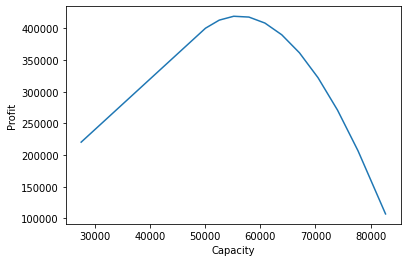

In [74]:
# Plot
r = [i for i in np.arange(optimization.x[0]-(optimization.x[0]/2),optimization.x[0]+(optimization.x[0]/2),1)]
plt.plot(r, [-profit(j) for j in r])
plt.xlabel('Capacity')
plt.ylabel('Profit')
plt.show()

# Conclusiones

* Optimal Capacity: 55125
* Maximum Profit: $419300